### Logistic Regression without Lasso 

In [24]:
# Importing required libraries
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import scikitplot as skplt
from sklearn.svm import l1_min_c
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import scikitplot as skplt

In [25]:
# Reading training dataset
userhome = os.path.expanduser('~')
path = '/Documents/'
X_train = pd.read_csv(userhome + path + 'X_train_v2.csv')
Y_train = pd.read_csv(userhome + path + 'Y_train_v2.csv',header=None )

In [26]:
Y_train = Y_train.iloc[:,0]

In [27]:
Y_train.shape

(39321,)

In [28]:
#checking missing records
X_train.iloc[:,:].isnull().any()

year_2014                      False
year_2015                      False
item_category_Accessories      False
item_category_Battery          False
item_category_Books            False
item_category_Cinema           False
item_category_Game Consoles    False
item_category_Games            False
item_category_Gifts            False
item_category_Music            False
item_category_Office           False
item_category_Official         False
item_category_Programs         False
Item Type_Electronics          False
item_price_s                   False
item_cnt_month_s               False
Sales_vol_s                    False
dtype: bool

In [45]:
#using default C to run logit model
start = datetime.now()
clf1 = linear_model.LogisticRegression(C=100,penalty='l1', tol=1e-6,solver='liblinear')
score = cross_val_score(clf1,X_train,Y_train,cv=5)
Y_train_pred = clf1.fit(X_train,Y_train)
print("This took ", datetime.now() - start)
# Accuracy of training data
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


This took  0:01:27.833248
Accuracy: 0.95 (+/- 0.08)


In [46]:
print('The accuracy of the svm classifier on training data is {:.2f} '.format(clf1.score(X_train, Y_train)))

The accuracy of the svm classifier on training data is 0.96 


In [47]:
#The value of coefficients after regualrization
clf1.coef_

array([[  0.15516975,   9.33850318,  -2.55726408,   0.73112652,
         -1.10073578,   5.69638119,  23.179012  ,   1.85716759,
         -0.62240487,   3.37342724,  -5.45522009,   0.20717868,
          5.77110636,   3.12937313,  -2.38479256,  -0.11898792,
         -0.60532247]])

In [48]:
Y_pred = clf1.predict(X_train)

In [49]:
# Confusion matrix of training data 
confusion_mat = confusion_matrix(Y_train,Y_pred)
print(confusion_mat)


[[ 7108  1056]
 [  694 30463]]


In [50]:
#classification report of training data
print(classification_report(Y_train,Y_pred))

             precision    recall  f1-score   support

          0       0.91      0.87      0.89      8164
          1       0.97      0.98      0.97     31157

avg / total       0.95      0.96      0.96     39321



In [51]:
#Reading test files
userhome = os.path.expanduser('~')
path = '/Documents/'
X_test = pd.read_csv(userhome + path + 'X_test_v2.csv')
Y_test = pd.read_csv(userhome + path + 'Y_test_v2.csv',header=None )

In [52]:
X_test.head()

,year_2014,year_2015,item_category_Accessories,item_category_Battery,item_category_Books,item_category_Cinema,item_category_Game Consoles,item_category_Games,item_category_Gifts,item_category_Music,item_category_Office,item_category_Official,item_category_Programs,Item Type_Electronics,item_price_s,item_cnt_month_s,Sales_vol_s
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.126743,-0.064139,-0.000513
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.126743,-0.064139,-0.000513
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.408436,-0.064139,-0.100928
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.178637,-0.064139,-0.057811
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.216810,-0.064139,-0.064973


In [53]:
Y_test = Y_test.iloc[:,0]

In [54]:
X_test.shape

(10180, 17)

In [55]:
#Prediction of labels
Y_pred1 = clf1.predict(X_test)

In [56]:
#Predictions based on probabilities
Y_pred_prob = clf1.predict_proba(X_test)

In [57]:
#Confusion matrix of the test data
confusion_mat = confusion_matrix(Y_test,Y_pred1)
print(confusion_mat)

[[1748  891]
 [ 560 6981]]


In [58]:
#Classification Report of the test data
print(classification_report(Y_test,Y_pred1))

             precision    recall  f1-score   support

          0       0.76      0.66      0.71      2639
          1       0.89      0.93      0.91      7541

avg / total       0.85      0.86      0.85     10180



In [59]:
#Accuracy of the model
print(accuracy_score(Y_test,Y_pred1))

0.857465618861


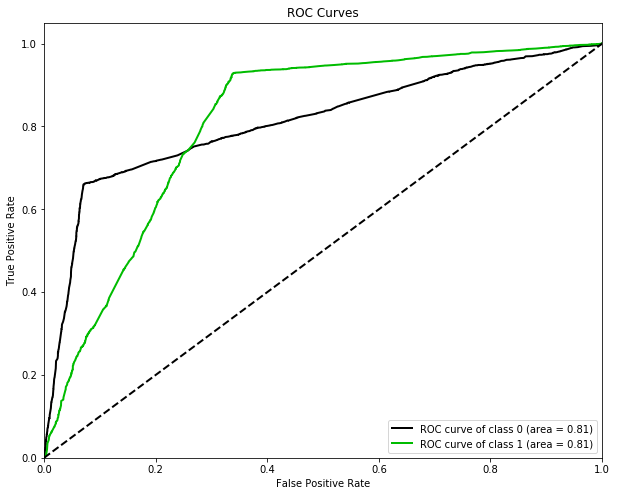

In [60]:
# RoC Curve
skplt.metrics.plot_roc(Y_test, Y_pred_prob,figsize=(10,8),plot_macro=False,plot_micro=False)